<a href="https://colab.research.google.com/github/TrickyTroll/equations-diff/blob/main/diff_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook sur la visualisation d'équations différentielles

Ce notebook a été conçu pour la section 6.2 du cours *Calcul avancé* donné au Cégep de Sainte-Foy. Il vise 
à aider les étudiants à développer une meilleure intuition par rapport à la création de champs de direction ainsi que par rapport à la méthode d'Euler. **Aucune connaissance de la programmation n'est requise pour l'utilisation de ce notebook.** J'essayerai d'expliquer le programme en détail. Par contre, il n'est aucunement nécessaire de comprendre le code pour apprendre avec ce notebook.

Pour plus d'informations sur l'utilisation ou la licence, voir le projet Github.

In [1]:
# Cette cellule ne sert qu'à importer des modules.
from matplotlib import style # Pour rendre les graphiques plus jolis.
import numpy as np # Librairie de calcul numérique.
from matplotlib import pyplot as plt # Pour tracer les graphiques.
from scipy.integrate import odeint # Pour intégrer

## [Champs de directions](https://en.wikipedia.org/wiki/Slope_field)

### Théorie

Les champs de directions permettent de visualiser les solutions générales d'une équation différentielle. Chaque petit vecteur correspond à la tangente (donc la direction) que prendrait une solution particulière passant par ce point.

Pour tracer un champ de directions, il faut donc calculer la dérivée de la fonction en plusieurs points. 

$$y' = f(x,y)$$

Ce calcul doit être réalisé pour le plus de points dans le plan $(x,y)$. Plus de points permettent d'obtenir une meilleure idée du comportement de la fonction.


Cette méthode s'avère particulièrement longue à réaliser à la main. Si les dérivées ne sont pas calculées en assez de points, le champ ne donne pas une très bonne idée de la fonction qu'il représente.

Heureusement, l'ordinateur peut faire ces calculs, et ce, très rapidement.

### Exemple d'un champ de directions

Dans cet exemple, nous calculerons le champ de directions de la fonction $\frac{dy}{dx}=x^2 + 2y$. C'est la même fonction que celle que nous avions tracée dans l'exemple 1! Pour tracer la fonction, j'utilise la librairie [Matplotlib](https://matplotlib.org). Voir la cellule suivant le programme pour les explications plus détaillées. **L'image produite peut être téléchargée avec un clic droit puis «Download Image».**

Pour changer la fonction représentée,


In [2]:
#@title Choix de la fonction
fonction = 'x^2+2y' #@param ["x^2+2y", "y/x", "e^x"] {allow-input: true}
print(fonction)

x^2+2y


Text(0, 0.5, '$y$')

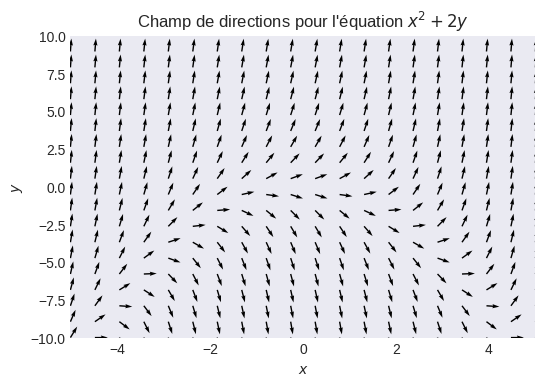

In [3]:
# Création de la figure.
plt.style.use("seaborn-dark")
fig = plt.figure(dpi = 100)
# Définition du champ de directions.
X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-10, 10, 20))
# Détection de la fonction précédemment choisie:
if fonction == "x^2+2y":
    func = lambda x, y: x**2 + 2*y
elif fonction == "y/x":
    func = lambda x, y: y/x
elif fonction == "e^x":
    func = lambda x, y: np.exp(x)
U = 1.0
V = func(X,Y)

# Normalisation des flèches.
N = np.sqrt(U ** 2 + V ** 2)
U = U / N
V = V / N
# Trace des flèches.
plt.quiver(X, Y, U, V, angles="xy")

# Informations sur le graphique.
plt.xlim([-5, 5])
plt.ylim([-10, 10])
plt.title("Champ de directions pour l'équation $" + fonction + "$")
plt.xlabel("$x$")
plt.ylabel("$y$")

#### Description du programme

Cette section comprend une description ligne par ligne du programme utilisé pour générer le champ de directions précédent.

```python
plt.style.use("seaborn-dark")
```

Cette ligne permet de choisir le style de représentation du graphique. Plusieurs [autres](https://matplotlib.org/3.2.1/gallery/style_sheets/style_sheets_reference.html) styles sont disponibles. Il est toutefois important de conserver les `""` peut importe le choix de style. Ces caractères permettent de spécifier au programmme que le style est du texte et non le nom d'une variable ou d'une autre entité.

```python
fig = plt.figure(dpi = 100)
```

Création de la figure avec une résolution de 100 points par pouce (dpi = **d**ots **p**er **i**nch).

```python
X, Y = np.meshgrid(np.linspace(-5, 5, 20), np.linspace(-10, 10, 20))
```

Création d'une matrice de de coordonnées. `np.linspace(-5, 5, 20)` génère $20$ valeurs entre $-5$ et $5$ `(-5,5,20)`. Ces valeurs permettent de construire l'axe des $x$. `np.linspace(-10, 10, 20)` gènère $20$ valeurs entre $-10$ et $10$. Ces valeurs sont utilisées pour construire l'axe des $y$. Comme il y a $20$ valeurs en $x$ et $20$ valeurs en $y$, un total de $20\times20 = 400$ dérivées seront calculées.

```python
if fonction == "x^2+2y":
    func = lambda x, y: x**2 + 2*y
elif fonction == "y/x":
    func = lambda x, y: y/x
elif fonction == "e^x":
    func = lambda x, y: np.exp(x)
else:
    func = lambda x, y: x**2 + 2*y
    print("La fonction choisie n'était pas valide.")
```

Ces conditions permettent de détecter le fonction choisie dans la cellule de choix de fonction. Chaque `if` ou `elif` vérifie si la fonction choisie correspond à l'une des fonctions disponibles. Si c'est le cas, la variable `func` est associée à la fonction correspondante écrite en Python. Si la fonction choisie n'est pas valide, le programme choisi la fonction `"x^2+2y"` par défaut.

```python
U = 1.0
V = func(X,Y)
```

Ici, la direction des pentes en $x$ sont définies par la valeur associée à `U` (1). Les valeurs de pente en $y$ sont définies par la valeur associée à `V` (la fonction choisie plus haut).

```python
N = np.sqrt(U ** 2 + V ** 2)
U = U / N
V = V / N
```
Les flèches sont ici normalisées pour toutes avoir la même longeur. 

```python
plt.quiver(X, Y, U, V, angles="xy")
```

Cette fonction ajoute les flèches au graphique. `X` et `Y` sont les valeurs en $x$ et $y$ des points où les pentes ont été calculées. `U` et `V` sont les directions en $x$ et en $y$ des vecteurs de direction.

```python
plt.xlim([-5, 5])
plt.ylim([-10, 10])
plt.title("Champ de directions pour l'équation $" + fonction + "$")
plt.xlabel("$x$")
plt.ylabel("$y$")
```

Ces fonctions permettent d'ajouter des attributs au graphique. Par exemple, `plt.ylim([-10, 10])` permet de limiter l'axe des $y$ à des valeurs entre $-10$ et $10$. `plt.xlabel("$x$")` permet quant à elle de définir le titre de l'axe des $x$ par «$x$». Les symboles `$` mentionnent au programme que c'est une équation mathématique.

#### Explications mathématiques

Pour créer le champ de directions, il faut calculer les dérivées sur chacun des $400$ points créés par la fonction `np.meshgrid()`.

Si nous utilisons l'équation de l'exemple 1:

$$\frac{dy}{dx} = x^2 + 2y$$.

Cette équation permet déjà d'obtenir les dérivées pour chaque point.

Chacun de ces points sont donc calculés directement en remplaçant les valeurs de $x$ et $y$ par chacun des $400$ points. Cette opération est réalisée par la ligne
```python
V = func(X,Y)
```
`V` est donc une liste de toutes les pentes calculées.

### Exemple de solutions particulières

Dans cet exemple, nous tracerons certaines courbes dans le champ obtenu précédemment à l'aide de différentes conditions initiales.

En observant le graphique généré plus haut, il est possible de remarquer qu'en suivant les flèches à différents points sur le graphique, nous n'arrivons pas toujours au même endroit. En effet, le graphique représente une série de solutions différentes pour l'équation différentielle.

Essayons de représenter quelques-unes de ces solutions.

Avant d'exécuter la cellule suivante, vous pouvez faire un choix de la valeur initiale en $y$ ainsi que la fonction à représenter.

In [4]:
#@title Choix de la condition initiale en y.
y0 =  0#@param {type:"number"}

In [5]:
#@title Choix de la fonction
fonction = 'e^x' #@param ["x^2+2y", "y/x", "e^x"] {allow-input: true}
print(fonction)

e^x


Text(0, 0.5, '$y$')

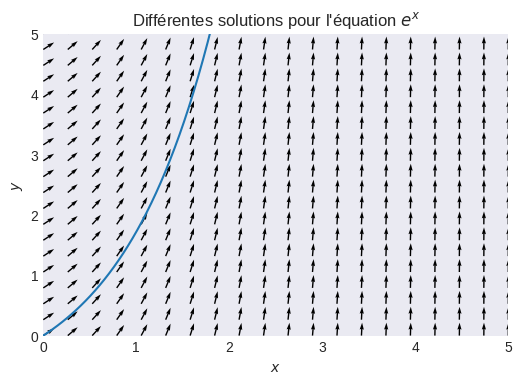

In [6]:
# Création de la figure.
plt.style.use("seaborn-dark")
fig = plt.figure(dpi = 100)
# Détection de la fonction précédemment choisie:
if fonction == "x^2+2y":
    func = lambda x, y: x**2 + 2*y
    y_start = -10
    y_end = 10
    x_start = -10
    x_end = 10
    def vf(y, x):
        return x**2 + 2*y

elif fonction == "y/x":
    func = lambda x, y: y/x
    y_start = -10
    y_end = 10
    x_start = -10
    x_end = 10
    def vf(y, x):
        return y/x

elif fonction == "e^x":
    func = lambda x, y: np.exp(x)
    y_start = 0
    y_end = 5
    x_start = 0
    x_end = 5
    def vf(y, x):
        return np.exp(x)

# Définition du champ de directions.
X, Y = np.meshgrid(np.linspace(x_start, x_end, 20), 
                   np.linspace(y_start, y_end, 20))

U = 1.0
V = func(X,Y)

# Normalisation des flèches.
N = np.sqrt(U ** 2 + V ** 2)
U = U / N
V = V / N
# Trace des flèches.
plt.quiver(X, Y, U, V, angles="xy")

xs = np.linspace(x_start, x_end, 100)
ys = odeint(vf, y0, xs)
ys = np.array(ys).flatten()

plt.plot(xs,ys)

# Informations sur le graphique.
plt.xlim([x_start, x_end])
plt.ylim([y_start, y_end])
plt.title("Différentes solutions pour l'équation $" + fonction + "$")
plt.xlabel("$x$")
plt.ylabel("$y$")

Les explications du programme et les explications mathématiques sont à venir.

## La méthode d'[Euler](https://en.wikipedia.org/wiki/Euler_method)

Cette section n'est pas encore complétée.

### Théorie

La méthode d'Euler permet de résoudre des équations différentielles ordinaires par une série d'approximations.